In [56]:
# import libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [57]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [58]:
# importing dataset
df = pd.concat([X,y],axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Analysis

In [59]:
df.shape

(48842, 15)

In [60]:
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [62]:
# Get catogerical columns
print("Categorical Columns: ")
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

Categorical Columns: 
workclass
education
marital-status
occupation
relationship
race
sex
native-country
income


In [63]:
# Get numerical columns
print("Numerical Columns: ")
for col in df.columns:
    if df[col].dtype == 'int64':
        print(col)

Numerical Columns: 
age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


In [64]:
# Get value counts of categorical columns
for col in df:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial   

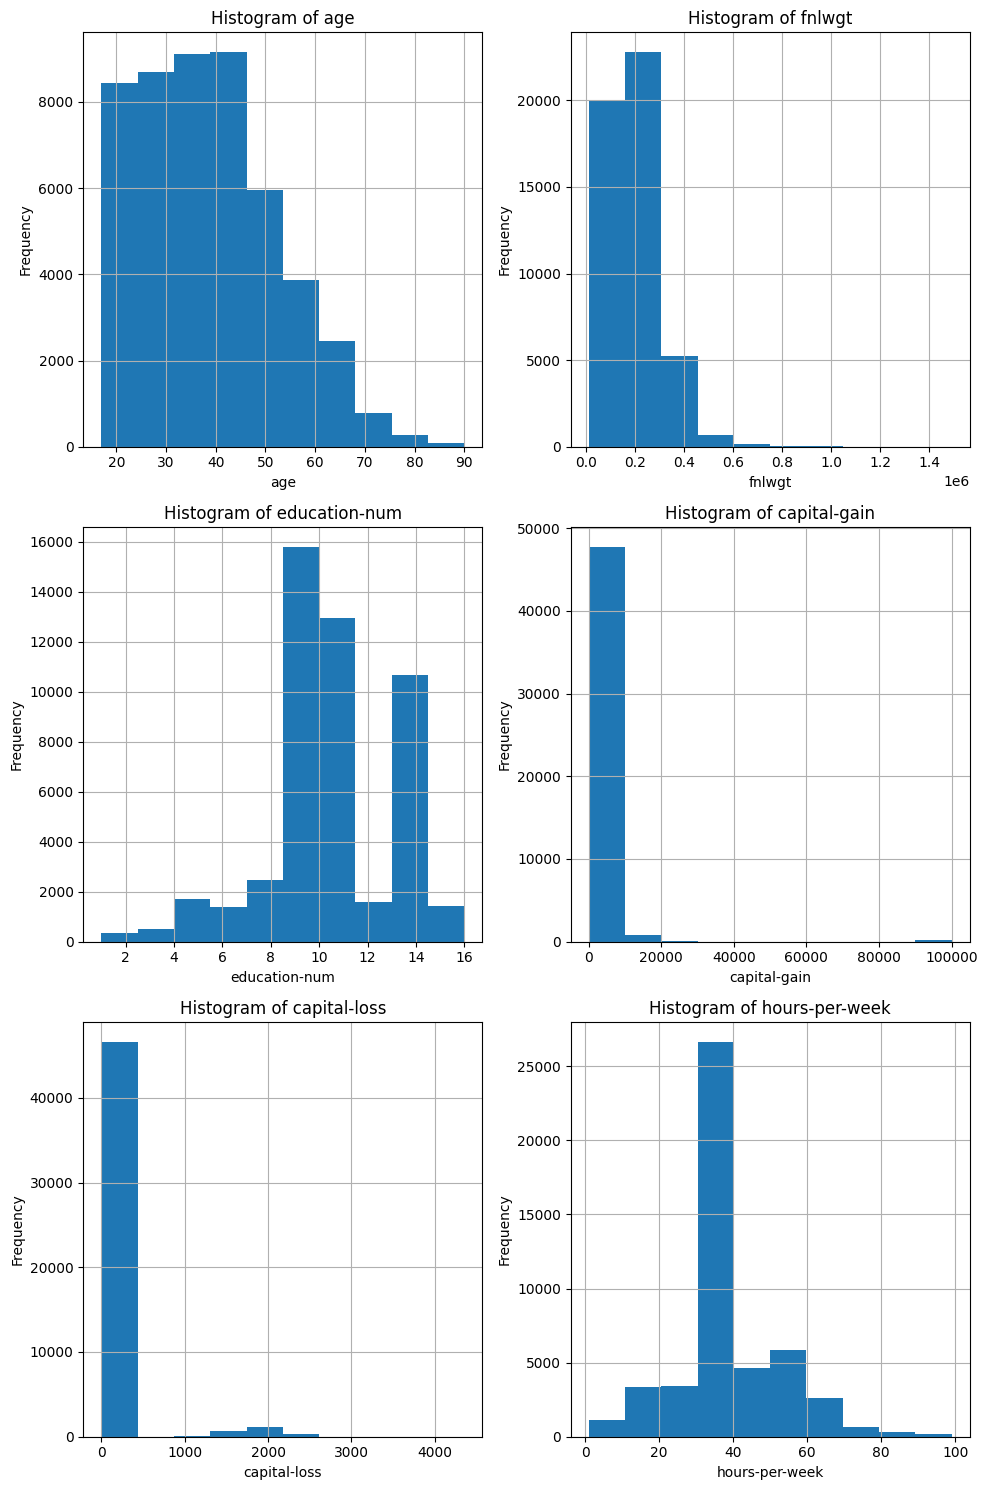

In [65]:
# Get value counts of numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))

axes = axes.flatten()


for i, col in enumerate(numerical_columns):
    df[col].hist(ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [66]:
# Save dataset to csv file
df.to_csv('Dataset/adult.csv', index=False)

## Data Preprocessing

#### Data Cleaning

In [67]:
# Load the data
df = pd.read_csv('Dataset/adult.csv')

In [68]:
# Fix the type errors in classes of 'income' column
df["income"] = df["income"].replace({'<=50K.' : '<=50K' , '>50K.' : '>50K'})

In [69]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [70]:
# Drop uneeded columns
df.drop('education-num', inplace=True, axis=1)
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [71]:
# Check duplicates
print("Before removing duplicates:", df.duplicated().sum())

Before removing duplicates: 48


In [72]:
# Remove Duplicates
df =df.drop_duplicates(keep='first')

In [73]:
# Check duplicates after removal
print("After removing duplicates:", df.duplicated().sum())

After removing duplicates: 0


In [74]:
# Check ? values
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [75]:
# Convert ? to NaN in categorical data
df = df.replace('?', np.nan)

In [76]:
# Check for null values
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

In [77]:
# Drop the missing values
df = df.dropna()

In [78]:
# Check for null values after dropping missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [79]:
# Check for ? values after dropping missing values
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### Dataset After Cleaning

In [80]:
df.income.value_counts()

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

In [81]:
# Shape of cleaned dataset
df.shape

(45175, 14)

In [82]:
df.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Data Visualization

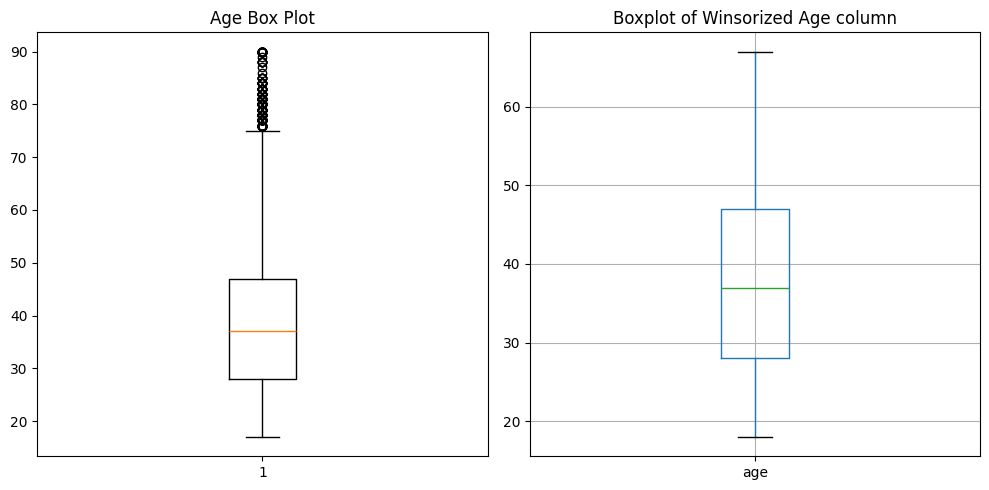

In [83]:
plt.figure(figsize=(10, 5))

# Original Age Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(x=df["age"])
plt.title("Age Box Plot")

# Winsorized Age Box Plot
df['age'] = winsorize(df['age'], limits=[0.025, 0.025])
plt.subplot(1, 2, 2)
pd.DataFrame(df['age']).boxplot()
plt.title('Boxplot of Winsorized Age column')

plt.tight_layout()
plt.show()

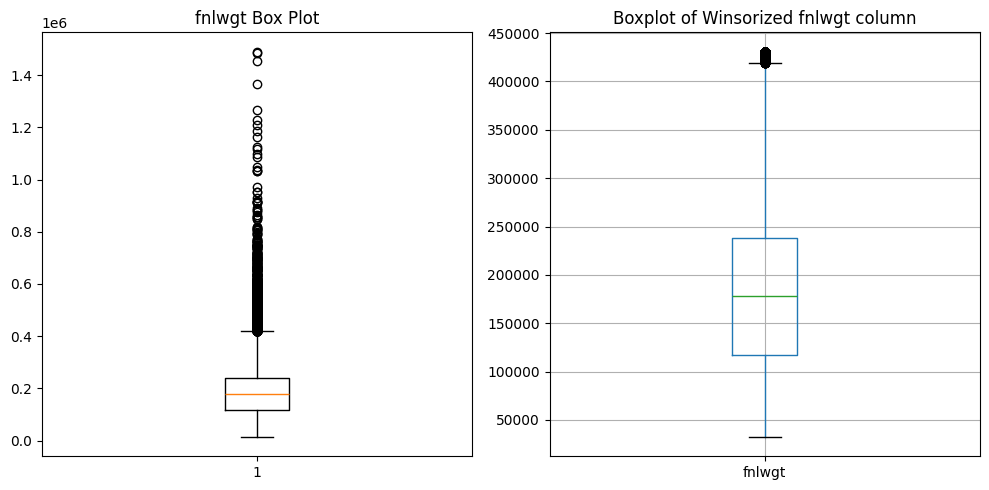

In [84]:
plt.figure(figsize=(10, 5))

# Original fnlwgt Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(x=df["fnlwgt"])
plt.title("fnlwgt Box Plot")

# Winsorized fnlwgt Box Plot
df['fnlwgt'] = winsorize(df['fnlwgt'], limits=[0.025, 0.025])
plt.subplot(1, 2, 2)
pd.DataFrame(df['fnlwgt']).boxplot()
plt.title('Boxplot of Winsorized fnlwgt column')

plt.tight_layout()
plt.show()

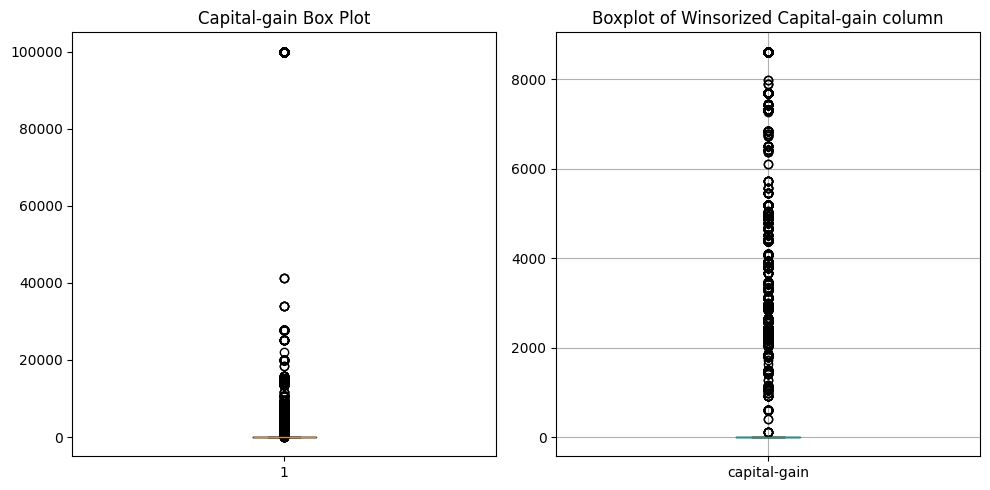

In [85]:
plt.figure(figsize=(10, 5))

# Original Capital-gain Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(x=df["capital-gain"])
plt.title("Capital-gain Box Plot")

# Winsorized Capital-gain Plot
df['capital-gain'] = winsorize(df['capital-gain'], limits=[0.025, 0.025])
plt.subplot(1, 2, 2)
pd.DataFrame(df['capital-gain']).boxplot()
plt.title('Boxplot of Winsorized Capital-gain column')

plt.tight_layout()
plt.show()

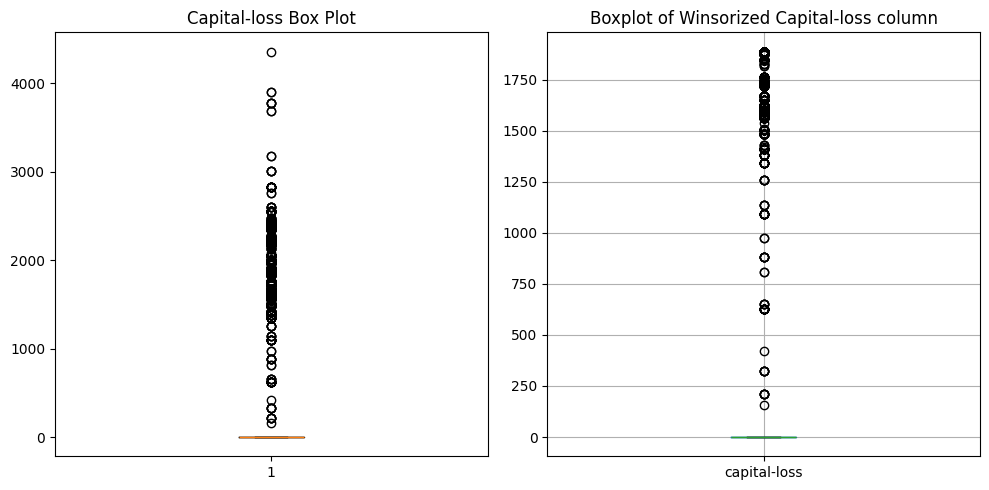

In [86]:
plt.figure(figsize=(10, 5))

# Original Capital-loss Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(x=df["capital-loss"])
plt.title("Capital-loss Box Plot")

# Winsorized Capital-loss Box Plot
df['capital-loss'] = winsorize(df['capital-loss'], limits=[0.025, 0.025])
plt.subplot(1, 2, 2)
pd.DataFrame(df['capital-loss']).boxplot()
plt.title('Boxplot of Winsorized Capital-loss column')

plt.tight_layout()
plt.show()

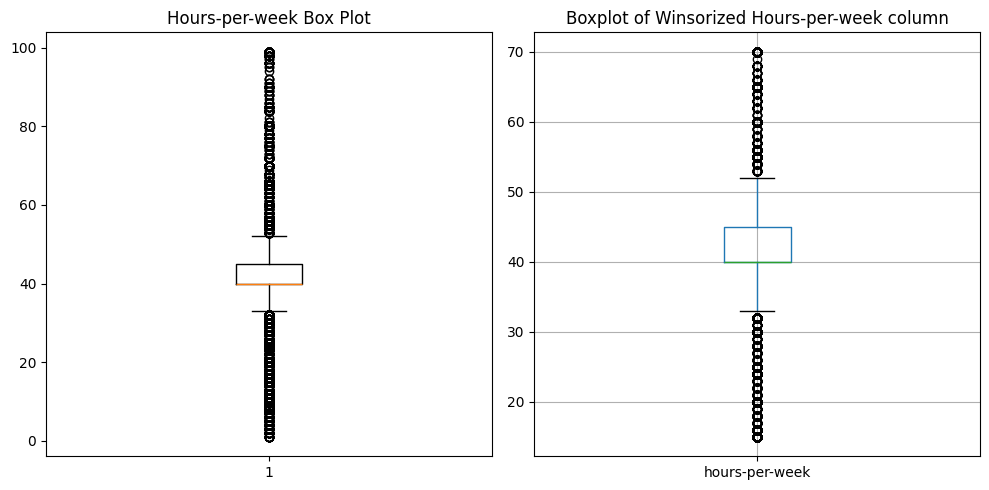

In [87]:
plt.figure(figsize=(10, 5))

# Original Hours-per-week Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(x=df["hours-per-week"])
plt.title("Hours-per-week Box Plot")

# Winsorized Hours-per-week Box Plot
df['hours-per-week'] = winsorize(df['hours-per-week'], limits=[0.025, 0.025])
plt.subplot(1, 2, 2)
pd.DataFrame(df['hours-per-week']).boxplot()
plt.title('Boxplot of Winsorized Hours-per-week column')

plt.tight_layout()
plt.show()

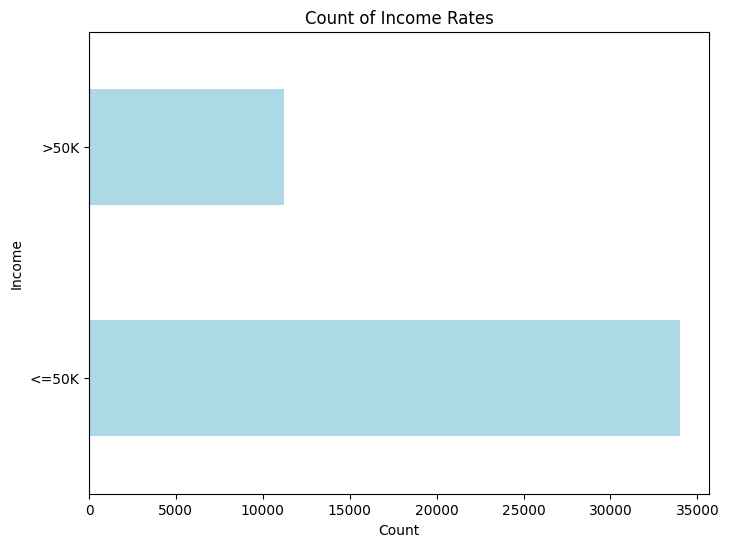

In [88]:
# Count of Income Class
income_counts = df['income'].value_counts()
plt.figure(figsize=(8, 6)) 
income_counts.plot(kind='barh', color='lightblue')
plt.xlabel('Count')
plt.ylabel('Income')
plt.title('Count of Income Rates')
plt.show()

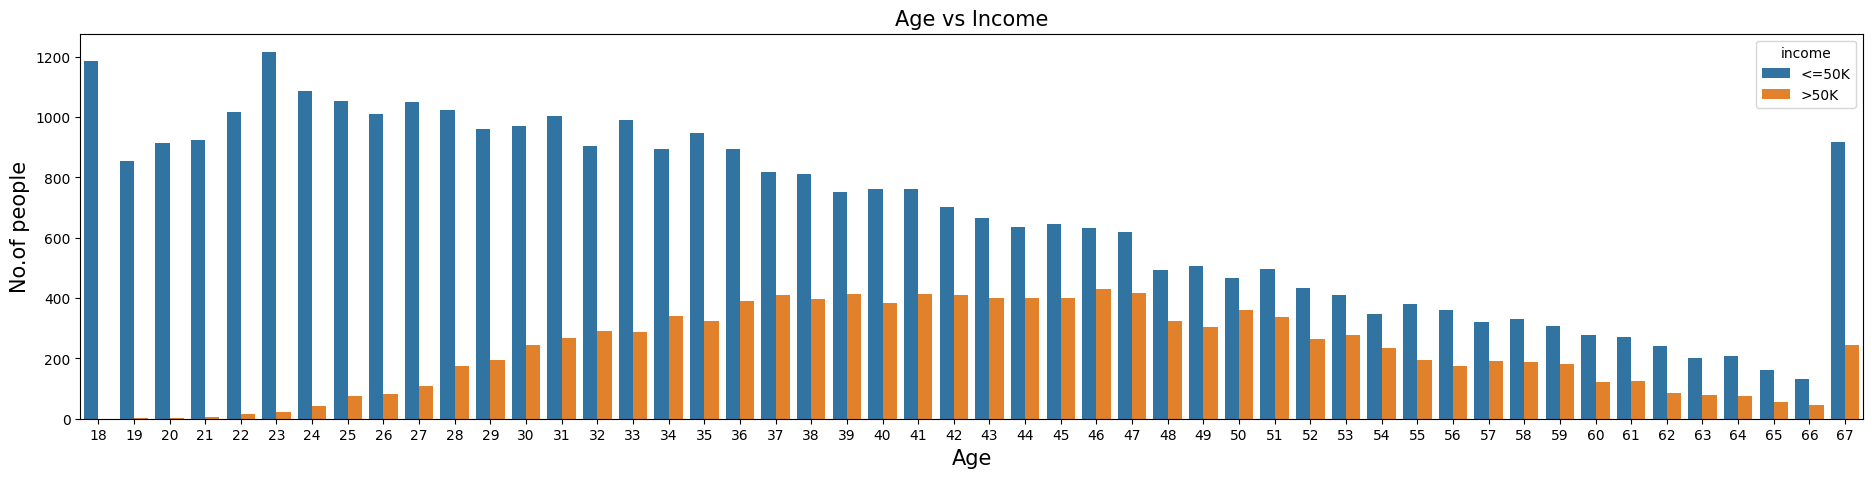

In [89]:
# Plot the bar chart of Age vs Income
fig, axes = plt.subplots(1,1,figsize=(23,5))
sns.countplot(data=df,x='age',hue='income')
plt.title('Age vs Income',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

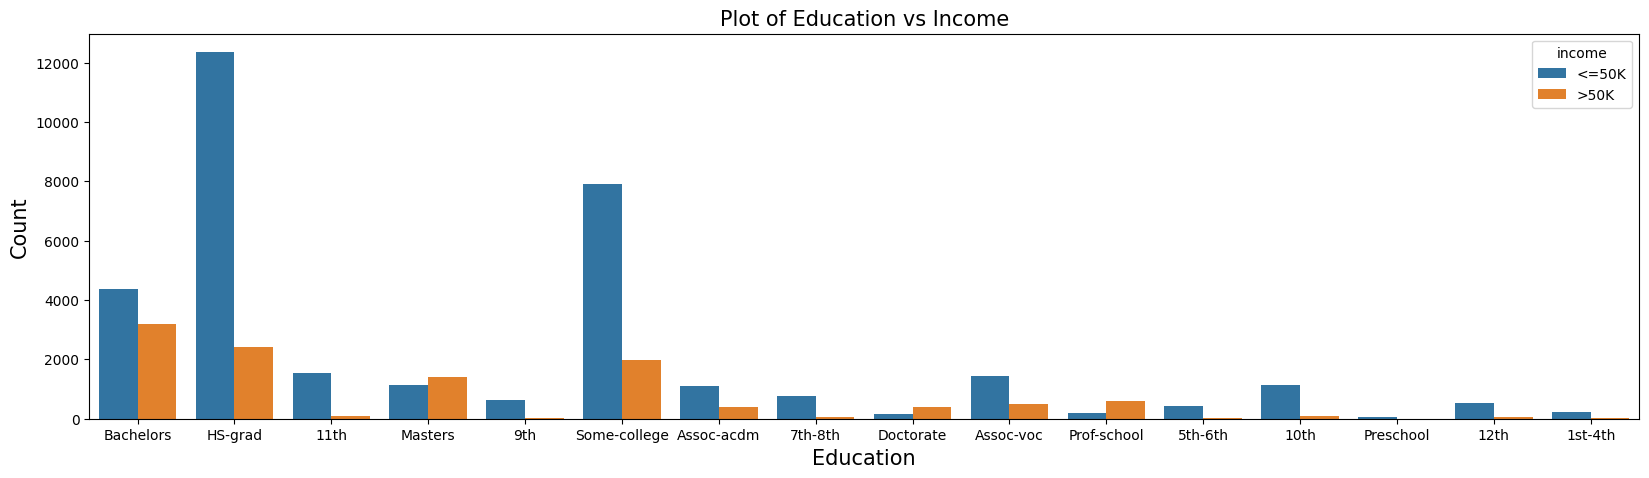

In [90]:
# Plot the bar chart of Education vs Income
fig, axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(data=df,x='education',hue='income')
plt.title('Plot of Education vs Income',fontsize=15)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

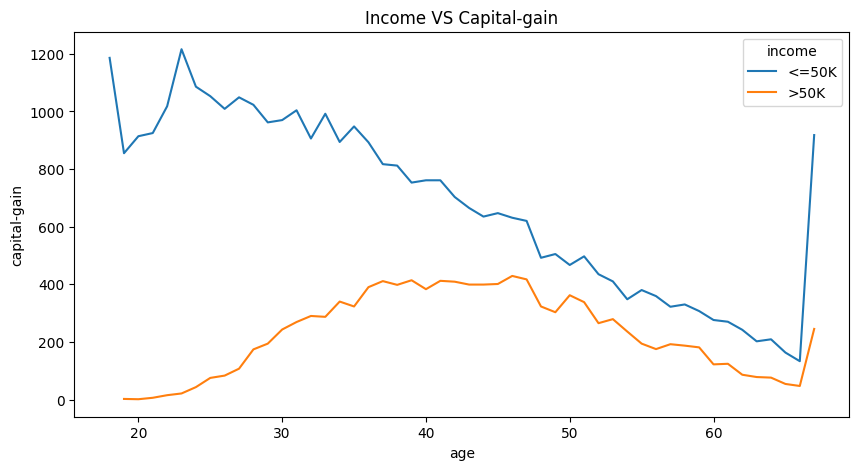

In [91]:
# Plot of Income VS Capital-gain based on Age
df_grp = df.groupby(['age', 'income']).apply(lambda x:x['capital-gain'].count()).reset_index(name="capital-gain")

plt.figure(figsize=(10,5))
sns.lineplot(x='age', y='capital-gain', data=df_grp, hue='income')
plt.title("Income VS Capital-gain")
plt.show()

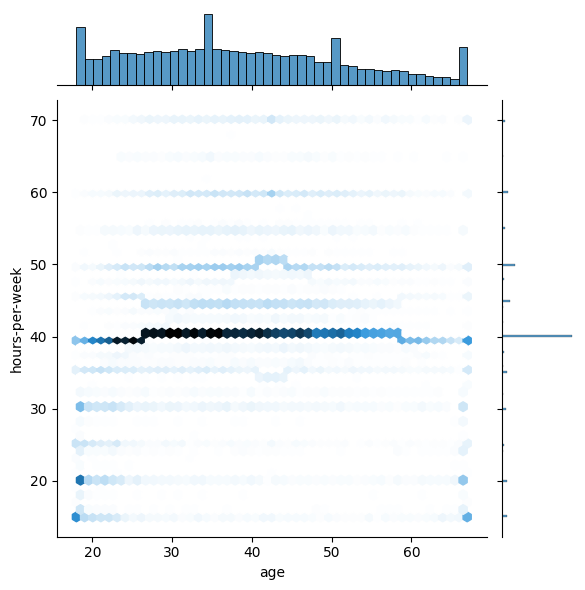

In [92]:
# Jointplot of age and hours-per-week with other columns
sns.jointplot(x ="age", y="hours-per-week", data=df, kind="hex")
plt.show()

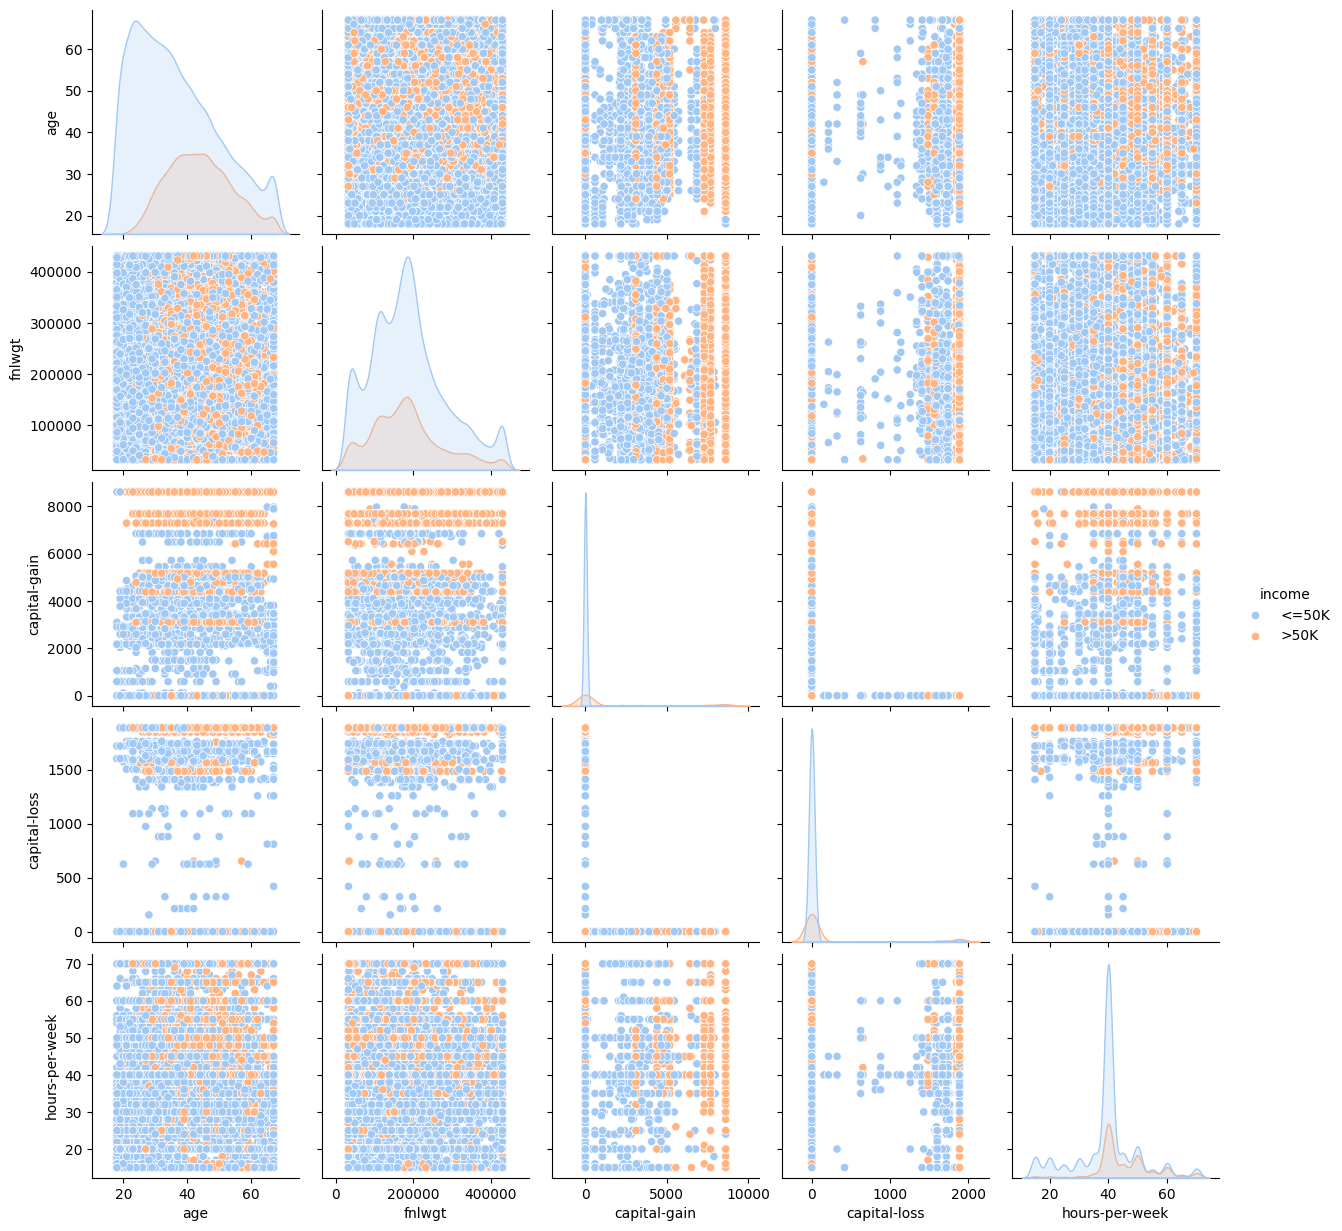

In [93]:
# Pairplot of Numerical columns vs Income
sns.pairplot(df, hue = 'income', palette = 'pastel')
plt.show()

## Data Encoding

In [94]:
columns_to_encode = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']

label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [95]:
df.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,0,15,38,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,12,2,3,5,4,0,0,0,40,38,0
6,49,2,160187,6,3,7,1,2,0,0,0,16,22,0
7,52,4,209642,11,2,3,0,4,1,0,0,45,38,1
8,31,2,45781,12,4,9,1,4,0,8614,0,50,38,1
9,42,2,159449,9,2,3,0,4,1,5178,0,40,38,1


In [96]:
# Calculating mean and standard deviation of the encoded values without including 'income' column
mean_encoded = df.mean()
std_encoded = df.std()

print("Mean of encoded values:", mean_encoded)
print("Standard deviation of encoded values:", std_encoded)

Mean of encoded values: age                   38.422557
workclass              2.204649
fnlwgt            187317.434776
education             10.313182
marital-status         2.584549
occupation             5.970426
relationship           1.412905
race                   3.680133
sex                    0.675042
capital-gain         500.344261
capital-loss          83.730050
hours-per-week        40.874068
native-country        36.403011
income                 0.247969
dtype: float64
Standard deviation of encoded values: age                  12.818796
workclass             0.958554
fnlwgt            96008.079416
education             3.817073
marital-status        1.500600
occupation            4.026857
relationship          1.597630
race                  0.832497
sex                   0.468365
capital-gain       1808.382915
capital-loss        378.797926
hours-per-week       10.926703
native-country        6.078690
income                0.431839
dtype: float64


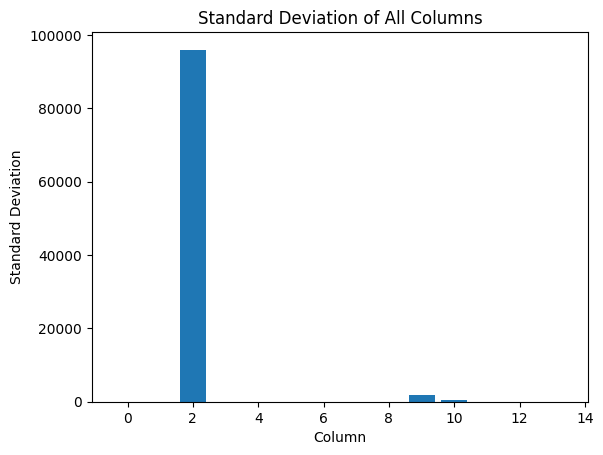

In [97]:
# Plot the standard deviation of all columns
plt.bar(range(len(std_encoded)), std_encoded)
plt.title("Standard Deviation of All Columns")
plt.xlabel("Column")
plt.ylabel("Standard Deviation")
plt.show()

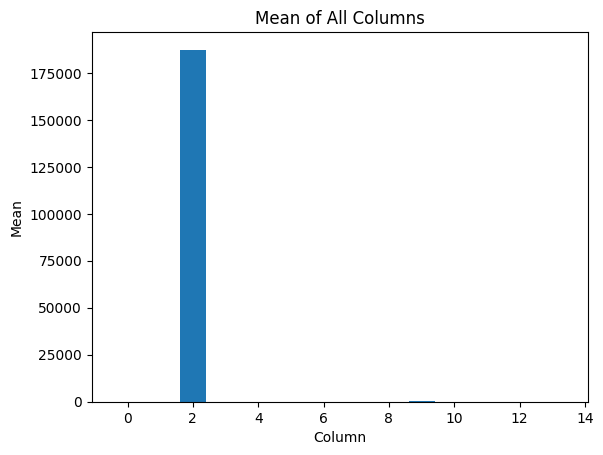

In [98]:
# Plot the mean of all columns
plt.bar(range(len(mean_encoded)), mean_encoded)
plt.title("Mean of All Columns")
plt.xlabel("Column")
plt.ylabel("Mean")
plt.show()